<div style="position: absolute; top: 0; right: 0;">
    <img src="https://coursereport-production.imgix.net/uploads/school/logo/62/original/blacksquare-logo.jpg?w=72&h=72" alt="Image">
</div>


# <center> BrainStation Capstone</center>

<div style=" justify-content: center; align-items: center; height: 100%;">
    <div style="text-align: center;">
        <img src="https://th.bing.com/th/id/OIG.SyoBFA29YRW8fF83wapS?w=270&h=270&c=6&r=0&o=5&pid=ImgGn" alt="Image" width="500">
    </div>
</div>


# <center> Drug Review Modeling

<center> By Ali Mohammed</center>

In [54]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings; warnings.simplefilter('ignore')
import random
import copy
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [40]:
df = pd.read_csv(r"C:/Users/xaliz/BrainStation/Capstone/Data/Sentiment_drug.csv")

In [41]:
df.head()

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
0,1236,1,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,3,10,28
1,1236,1,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,3,10,27
2,1236,13,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,3,10,26
3,1236,1,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,3,10,25
4,1236,13,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,3,10,24


In [42]:
df.describe()

,drugName,condition,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
count,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000,177444.000000
mean,1098.397207,27.273190,0.479898,28.589730,2014.001927,87.100646,64.963498,460.546161,2.535611,6.506797,15.660592
std,601.318954,20.677517,0.499597,37.457149,2.679401,44.785405,28.838542,235.314617,1.119878,3.413736,8.778886
min,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000
25%,646.000000,13.000000,0.000000,6.000000,2012.000000,51.000000,43.000000,271.000000,3.000000,4.000000,8.000000
50%,1123.000000,21.000000,0.000000,16.000000,2015.000000,88.000000,67.000000,463.000000,3.000000,7.000000,16.000000
75%,1574.250000,44.000000,1.000000,37.000000,2016.000000,128.000000,91.000000,687.000000,3.000000,9.000000,23.000000
max,2183.000000,71.000000,1.000000,1291.000000,2017.000000,1894.000000,777.000000,10499.000000,5.000000,12.000000,31.000000


In [43]:
import pickle

# Load the label encoder object from the pickle file
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Decode the encoded "condition" feature in the dataframe
df['condition'] = label_encoder.inverse_transform(df['condition'])


In [44]:
df.head(10)

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
0,1236,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,3,10,28
1,1236,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,3,10,27
2,1236,Birth Control,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,3,10,26
3,1236,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,3,10,25
4,1236,Birth Control,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,3,10,24
5,1236,Abnormal Uterine Bleeding,"""im 18 got heavy bleeding. ive always heard bc...",0,6,2015,113,88,554,3,10,22
6,1236,Abnormal Uterine Bleeding,"""im 19 heavy painful periods since forever! go...",0,2,2015,121,89,633,3,10,21
7,1236,Abnormal Uterine Bleeding,"""im 30 year old woman. got shot august 9th. bl...",0,5,2015,65,53,319,3,10,21
8,1236,Abnormal Uterine Bleeding,"""im 17 years old got shot august 2015, persona...",0,2,2015,87,66,434,3,10,20
9,1236,Abnormal Uterine Bleeding,"""first month awesome. absolutely wonderful. st...",0,7,2015,102,79,526,3,10,18


In [45]:
df['condition']

0         Abnormal Uterine Bleeding
1         Abnormal Uterine Bleeding
2                     Birth Control
3         Abnormal Uterine Bleeding
4                     Birth Control
                    ...            
177439          Bacterial Infection
177440                    Sinusitis
177441                    Sinusitis
177442      Urinary Tract Infection
177443                    Sinusitis
Name: condition, Length: 177444, dtype: object

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split into train and remaining data
train_df, remaining_df = train_test_split(df, test_size=1-train_ratio, random_state=42)

# Split the remaining data into validation and test sets
val_df, test_df = train_test_split(remaining_df, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

In [47]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2))

# Fit the vectorizer on the training set only
vectorizer.fit(train_df['review'])

# Transform the text data into document-term matrices
X_train = vectorizer.transform(train_df['review'])
X_val = vectorizer.transform(val_df['review'])
X_test = vectorizer.transform(test_df['review'])

# Get the corresponding target variables
y_train = train_df['condition']
y_val = val_df['condition']
y_test = test_df['condition']

In [48]:
# Print the shapes of the resulting splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (124210, 188794) (124210,)
Validation set shape: (26617, 188794) (26617,)
Test set shape: (26617, 188794) (26617,)


In [11]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
clf = LogisticRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the labels for the validation data
y_pred = clf.predict(X_val)

# Evaluate the model performance
accuracy_train = clf.score(X_train, y_train)
accuracy_val = clf.score(X_val, y_val)

print("Train Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)

Train Accuracy: 0.9920457290073263
Validation Accuracy: 0.8624187549310591


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the validation data
y_pred = clf.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred))



                               precision    recall  f1-score   support

                         ADHD       0.94      0.93      0.94       639
    Abnormal Uterine Bleeding       0.92      0.75      0.83       388
                         Acne       0.94      0.95      0.95      1108
           Alcohol Dependence       0.95      0.90      0.93        69
            Allergic Rhinitis       0.87      0.78      0.82       222
                      Anxiety       0.74      0.80      0.77      1154
           Anxiety and Stress       0.76      0.65      0.70       325
          Asthma, Maintenance       0.93      0.90      0.92       105
                    Back Pain       0.66      0.48      0.56       122
          Bacterial Infection       0.71      0.61      0.65       179
          Bacterial Vaginitis       0.82      0.63      0.71       100
 Benign Prostatic Hyperplasia       0.88      0.77      0.82       118
              Bipolar Disorde       0.85      0.85      0.85       867
     

In [13]:
# Compute the average absolute coefficient value across all classes
feature_importance = np.mean(np.abs(clf.coef_), axis=0)

# Sort the features based on their importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = np.array(vectorizer.get_feature_names())[sorted_indices]

# Print the top N features with the highest importance
top_n = 20
print("Top", top_n, "features:")
for feature in sorted_features[:top_n]:
    print(feature)

Top 20 features:
pain
anxiety
relief
migraines
infection
patch
depression
sleep
product
weight
diarrhea
pill
cramps
taste
symptoms
mood
cymbalta
acne
months
mg


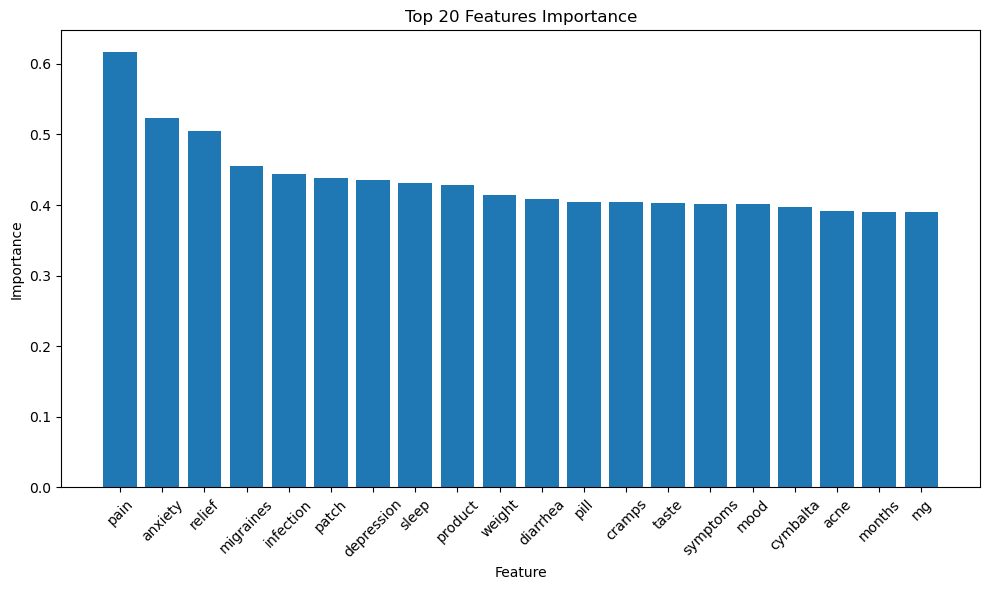

In [14]:
sorted_importance = feature_importance[sorted_indices]

# Plot the feature importance
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), sorted_importance[:top_n], align='center')
plt.xticks(range(top_n), sorted_features[:top_n], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Features Importance'.format(top_n))
plt.tight_layout()
plt.show()


Baseine model now lets try random forest, then move on with bert.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf_rf.fit(X_train, y_train)

# Make predictions on the training and validation data
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_val_rf = clf_rf.predict(X_val)

# Calculate and print the accuracy
accuracy_train_rf = clf_rf.score(X_train, y_train)
accuracy_val_rf = clf_rf.score(X_val, y_val)
print("Train Accuracy (Random Forest):", accuracy_train_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# Print the classification report
print(classification_report(y_val, y_pred_val_rf))


Train Accuracy (Random Forest): 0.9976169390548265
Validation Accuracy (Random Forest): 0.8360822031032799
                               precision    recall  f1-score   support

                         ADHD       0.92      0.93      0.92       639
    Abnormal Uterine Bleeding       1.00      0.64      0.78       388
                         Acne       0.89      0.93      0.91      1108
           Alcohol Dependence       1.00      0.78      0.88        69
            Allergic Rhinitis       0.85      0.74      0.79       222
                      Anxiety       0.69      0.79      0.74      1154
           Anxiety and Stress       0.94      0.53      0.68       325
          Asthma, Maintenance       0.97      0.80      0.88       105
                    Back Pain       0.91      0.43      0.59       122
          Bacterial Infection       0.86      0.39      0.54       179
          Bacterial Vaginitis       0.78      0.31      0.44       100
 Benign Prostatic Hyperplasia       0.95

In [66]:
# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])
rf_params = {'classifier__n_estimators': [100, 200], 'classifier__max_depth':  [60,80]}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5)
rf_grid.fit(X_train, y_train)


best_rf_model = rf_grid.best_estimator_

rf_val_preds = best_rf_model.predict(X_val)
rf_val_acc = accuracy_score(y_val, rf_val_preds)


rf_train_preds = best_rf_model.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_preds)
print("Training Accuracy:")
print("Random Forest:", rf_train_acc)
print("Confusion Report for Random Forest:")
print(rf_val_cr)


Training Accuracy:
Random Forest: 0.8550519281861364
Confusion Report for Random Forest:
                               precision    recall  f1-score   support

                         ADHD       0.95      0.56      0.70       639
    Abnormal Uterine Bleeding       0.00      0.00      0.00       388
                         Acne       0.94      0.62      0.75      1108
           Alcohol Dependence       0.00      0.00      0.00        69
            Allergic Rhinitis       0.00      0.00      0.00       222
                      Anxiety       0.61      0.29      0.39      1154
           Anxiety and Stress       1.00      0.02      0.04       325
          Asthma, Maintenance       1.00      0.01      0.02       105
                    Back Pain       1.00      0.01      0.02       122
          Bacterial Infection       0.00      0.00      0.00       179
          Bacterial Vaginitis       1.00      0.01      0.02       100
 Benign Prostatic Hyperplasia       1.00      0.01      0.

In [67]:
rf_val_cr = classification_report(y_val, rf_val_preds)

print("Random Forest training acc:", rf_train_acc)
print("Random Forest validation acc:", rf_val_acc)
print("Confusion Report for Random Forest:")
print(rf_val_cr)

Random Forest training acc: 0.8550519281861364
Random Forest validation acc: 0.7051884134199947
Confusion Report for Random Forest:
                               precision    recall  f1-score   support

                         ADHD       0.92      0.83      0.87       639
    Abnormal Uterine Bleeding       1.00      0.23      0.38       388
                         Acne       0.88      0.85      0.87      1108
           Alcohol Dependence       1.00      0.46      0.63        69
            Allergic Rhinitis       1.00      0.42      0.59       222
                      Anxiety       0.67      0.67      0.67      1154
           Anxiety and Stress       1.00      0.35      0.52       325
          Asthma, Maintenance       0.98      0.44      0.61       105
                    Back Pain       1.00      0.11      0.19       122
          Bacterial Infection       0.91      0.11      0.20       179
          Bacterial Vaginitis       0.89      0.08      0.15       100
 Benign Prostat

In [68]:
best_rf_params = rf_grid.best_params_

# Print the best parameters
print("Best Random Forest Parameters:")
for param, value in best_rf_params.items():
    print(f"{param}: {value}")


Best Random Forest Parameters:
classifier__max_depth: 80
classifier__n_estimators: 200


now that we have our best parameters, we can build our final condition classification model and run predictions on it. Furtheron a supplemntary introduction to bert to be exlpored at a later time.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import vstack

# Combine the features and target variables of the training and validation sets
X_train_val = vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Create a new instance of the Random Forest classifier with the best parameters
final_rf_model = RandomForestClassifier(
    n_estimators=rf_grid.best_params_['classifier__n_estimators'],
    max_depth=rf_grid.best_params_['classifier__max_depth']
)


In [ ]:
final_rf_model.fit(X_train_val, y_train_val)
train_preds = final_rf_model.predict(X_train_val)

In [78]:
# Calculate accuracy on the train set
train_acc = accuracy_score(y_train_val, train_preds)

print("Train Accuracy:", train_acc)

# Predict on the test set
test_preds = final_rf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.8553640926359339
Test Accuracy: 0.7306984258180862


In [83]:
# Assuming y_test and test_preds are your ground truth and predicted labels, respectively
classification_test_report = classification_report(y_test, test_preds)
print("Test Classification Report:")
print(classification_test_report)


Test Classification Report:
                               precision    recall  f1-score   support

                         ADHD       0.97      0.84      0.90       693
    Abnormal Uterine Bleeding       1.00      0.30      0.46       436
                         Acne       0.94      0.86      0.90      1107
           Alcohol Dependence       1.00      0.53      0.69        79
            Allergic Rhinitis       0.95      0.50      0.66       208
                      Anxiety       0.71      0.73      0.72      1162
           Anxiety and Stress       1.00      0.33      0.49       356
          Asthma, Maintenance       0.96      0.52      0.68        94
                    Back Pain       0.92      0.09      0.17       121
          Bacterial Infection       1.00      0.20      0.34       203
          Bacterial Vaginitis       1.00      0.08      0.15       109
 Benign Prostatic Hyperplasia       1.00      0.34      0.51       120
              Bipolar Disorde       0.92      0.

We reach our final model where we can make predictions on, we will use new reviews we can find online to test our model.

In [69]:
#we copy our text preprocess from our other notebook!
def to_lower(review):
    lower = review.lower()
    return lower
#text to lower
def remove_special_characters(review):
    special_remove = review.replace(r'[^\w\d\s]', ' ')
    return special_remove
#remove special characters like !?#$%^
def remove_non_ascii(review):
    ascii_remove = review.replace(r'[^\x00-\x7F]+', ' ')
    return ascii_remove
#remove no ascii characters
def remove_whitespaces(review):
    whitespace_remove = review.replace(r'^\s+|\s+?$', '')
    return whitespace_remove
#remove spaces
def remove_multiple_whitespaces(review):
    multiw_remove = review.replace(r'\s+', ' ')
    return multiw_remove
def replace_multiple_dots(review):
    dataframe = review.replace(r'\.{2,}', ' ')
    return dataframe
def remove_special_string(review):
    return review.replace("&#039;", "")

#function to employ our preprocessing
def preprocess_text(review):
    review = to_lower(review)
    review = remove_special_characters(review)
    review = remove_non_ascii(review)
    review = remove_whitespaces(review)
    review = remove_multiple_whitespaces(review)
    review = replace_multiple_dots(review)
    review = remove_special_string(review)
    return review

In [80]:
# Prompt the user to enter a text
text = input("Enter a text: ")

# Preprocess the user input
preprocessed_text = preprocess_text(text)

# Transform the preprocessed text
transformed_text = vectorizer.transform([preprocessed_text])

# Predict the condition
condition = final_rf_model.predict(transformed_text)

# Print the predicted condition
print("Predicted Condition:", condition)


Enter a text: I've had GAD since a child, losing a parent early. My first panic attack was at 12, not knowing why I was suddenly unable to breathe. After repeated traumatic experiences, I developed a social aversion that rapidly turned into severe agoraphobia. Without this life-saving drug, I would have never been able to have a recording career, find my spouse, and live a normal life. The days I am using this medication are 100x more productive and filled with joy...I'm sick of seeing only negative propaganda about Xanax. If you are a responsible adult who uses it properly, it is not harmful. If you use a heart medication each day, and it keeps you healthy, are you "addicted" to that? It's the same with anxiety. Mental health is just as serious as the physical. Just because some are abusing it, doesn't mean judge those who use it correctly. I appreciate everything this med has done for me!
Predicted Condition: ['Anxiety']


The model can be tested here, it predicts the condition based on the inputed text

***

### <CENTER> SUPPLEMENTARY BERT MODEL

In [ ]:
import torch
import pandas as pd

In [23]:
# Read the data
df = pd.read_csv(r"C:/Users/xaliz/BrainStation/Capstone/Data/Sentiment_drug.csv")

In [24]:
df.head()

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
0,1236,1,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,3,10,28
1,1236,1,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,3,10,27
2,1236,13,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,3,10,26
3,1236,1,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,3,10,25
4,1236,13,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,3,10,24


We set the batch size to cover 75th perctile of the data to save on computations

In [25]:

from transformers import AutoTokenizer

# Load the SciBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
# Tokenize the reviews
tokenized_reviews = [tokenizer.tokenize(review) for review in df['review']]

# Calculate sequence lengths
sequence_lengths = [len(tokens) for tokens in tokenized_reviews]

# Calculate statistics
print("Sequence Length Statistics:")
print("Mean:", np.mean(sequence_lengths))
print("Median:", np.median(sequence_lengths))
print("Minimum:", np.min(sequence_lengths))
print("Maximum:", np.max(sequence_lengths))
print("25th Percentile:", np.percentile(sequence_lengths, 25))
print("75th Percentile:", np.percentile(sequence_lengths, 75))

Sequence Length Statistics:
Mean: 70.75071571876198
Median: 70.0
Minimum: 3
Maximum: 1599
25th Percentile: 42.0
75th Percentile: 100.0


In [26]:
df.head()

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
0,1236,1,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,3,10,28
1,1236,1,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,3,10,27
2,1236,13,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,3,10,26
3,1236,1,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,3,10,25
4,1236,13,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,3,10,24


In [27]:
# Tokenize the review text
df['review_tokenized'] = df['review'].apply(lambda x: tokenizer.encode(x, truncation=True, padding=True))

# Drop the original review column
df.drop('review', axis=1, inplace=True)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Apply the tokenizer specifically made for scibert

In [28]:
df.head()

,drugName,condition,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day,review_tokenized
0,1236,1,0,4,2015,100,77,558,3,10,28,"[102, 1554, 528, 719, 30112, 4209, 1053, 5376,..."
1,1236,1,0,7,2015,59,46,294,3,10,27,"[102, 1554, 259, 16695, 1021, 1320, 1978, 1043..."
2,1236,13,1,12,2015,143,98,750,3,10,26,"[102, 1554, 28821, 1379, 16695, 30113, 1313, 2..."
3,1236,1,0,4,2015,152,105,746,3,10,25,"[102, 1554, 259, 1114, 239, 16695, 30113, 205,..."
4,1236,13,0,3,2015,141,97,750,3,10,24,"[102, 1554, 238, 3624, 413, 143, 16695, 3190, ..."


Train & test split

In [31]:
from torch.nn.utils.rnn import pad_sequence
import torch

X = df[['drugName', 'review_tokenized', 'rating', 'usefulCount', 'year', 'count_word', 'count_unique_word',
        'count_letters', 'availability', 'month', 'day']]
y = df['condition']

# Split the data into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=1-train_ratio, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

# Convert the tokenized review to tensors
X_train_input_ids = pad_sequence([torch.tensor(tokens) for tokens in X_train['review_tokenized']], batch_first=True)
X_val_input_ids = pad_sequence([torch.tensor(tokens) for tokens in X_val['review_tokenized']], batch_first=True)
X_test_input_ids = pad_sequence([torch.tensor(tokens) for tokens in X_test['review_tokenized']], batch_first=True)

# Set the maximum sequence length
max_length = 100

# Truncate or pad the tokenized sequences to the maximum length
X_train_input_ids = X_train_input_ids[:, :max_length]
X_val_input_ids = X_val_input_ids[:, :max_length]
X_test_input_ids = X_test_input_ids[:, :max_length]

# Create attention masks
X_train_attention_masks = torch.where(X_train_input_ids != 0, torch.tensor(1), torch.tensor(0))
X_val_attention_masks = torch.where(X_val_input_ids != 0, torch.tensor(1), torch.tensor(0))
X_test_attention_masks = torch.where(X_test_input_ids != 0, torch.tensor(1), torch.tensor(0))

Setup the data loaders for the bert model

In [32]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Set batch size
batch_size = 16

# Create data loaders
train_data = TensorDataset(X_train_input_ids, X_train_attention_masks, torch.tensor(y_train.values))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(X_val_input_ids, X_val_attention_masks, torch.tensor(y_val.values))
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


In [33]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")


CUDA is not available.


#### Since cuda was not available training the model was almost impossible, so using pertrained to finetune was also out my macines capabilities with each epoch taking about 22h

In [35]:
from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm  # Import tqdm

# Load the pre-trained SciBERT model
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Set the number of training epochs
epochs = 5

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Train the model
for epoch in range(epochs):
    model.train()
    total_loss = 0
    total_predictions = []
    total_targets = []

    # Wrap the data loader with tqdm for a progress bar
    train_iterator = tqdm(train_dataloader, desc="Epoch {}".format(epoch+1))

    for batch in train_iterator:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.last_hidden_state[:, 0, :]

        loss_function = torch.nn.CrossEntropyLoss()
        loss = loss_function(logits, batch_labels)
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        # Convert logits to predictions
        _, predicted_labels = torch.max(logits, dim=1)
        total_predictions.extend(predicted_labels.tolist())
        total_targets.extend(batch_labels.tolist())

    # Compute the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        val_predictions = []
        val_targets = []

        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs.last_hidden_state[:, 0, :]

            probabilities = torch.softmax(logits, dim=1)
            _, predicted_labels = torch.max(probabilities, dim=1)

            val_predictions.extend(predicted_labels.tolist())
            val_targets.extend(batch_labels.tolist())

    train_accuracy = accuracy_score(total_targets, total_predictions)
    val_accuracy = accuracy_score(val_targets, val_predictions)

    print(f"Epoch: {epoch+1}")
    print(f"Average training loss: {avg_train_loss}")
    print(f"Training accuracy: {train_accuracy}")
    print(f"Validation accuracy: {val_accuracy}")
    print("--------------------")


Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Epoch 1:   0%|          | 14/7764 [02:26<22:33:13, 10.48s/it]


KeyboardInterrupt: 

Time per iteration: 10.51 seconds


Iterations remaining: 7752


Estimated remaining time: 10.51 seconds/iteration * 7752 iterations = 81,429.52 22.6seconds per epoch or 22.6 hours per epoch


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained SciBERT model and tokenizer
model_name = "allenai/scibert_scivocab_uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# User input
text = input("Enter the text: ")

# Preprocess the user input
inputs = tokenizer.encode_plus(
    text,
    truncation=True,
    padding=True,
    return_tensors="pt"
)
input_ids = inputs["input_ids"].to(device)
attention_mask = inputs["attention_mask"].to(device)

# Make a prediction
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.last_hidden_state
    probabilities = torch.softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1)

# Output the predicted condition
predicted_condition = predicted_labels.item()
print("Predicted condition:", predicted_condition)
